In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots appear in notebook
%matplotlib inline

# Set Seaborn style
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv(r"../data/processed_data/bank_of_canada_cleaned.csv")


In [ ]:
df.head()

,Credit_Type,Adjustment_Type,May-25,Jun-25,Jul-25,Aug-25,Sep-25
0,Total business and household credit,Seasonally adjusted,4626688.0,4619867.0,4614677.0,4613161.0,4631546.0
1,Household credit,Seasonally adjusted,2293203.0,2295706.0,2302056.0,2311208.0,2327992.0
2,Residential mortgage credit,Seasonally adjusted,1671280.0,1677019.0,1682913.0,1691288.0,1705636.0
3,Consumer credit,Seasonally adjusted,621923.0,618687.0,619143.0,619920.0,622356.0
4,Business credit 2,Seasonally adjusted,2333486.0,2324162.0,2312623.0,2301953.0,2303554.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Credit_Type      5 non-null      object 
 1   Adjustment_Type  5 non-null      object 
 2   May-25           5 non-null      float64
 3   Jun-25           5 non-null      float64
 4   Jul-25           5 non-null      float64
 5   Aug-25           5 non-null      float64
 6   Sep-25           5 non-null      float64
dtypes: float64(5), object(2)
memory usage: 412.0+ bytes


In [6]:
# Summary statistics for numeric columns
df.describe()

,May-25,Jun-25,Jul-25,Aug-25,Sep-25
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,2.309316e+06,2.307088e+06,2.306282e+06,2.307506e+06,2.318217e+06
std,1.468455e+06,1.466037e+06,1.463196e+06,1.461486e+06,1.466544e+06
min,6.219230e+05,6.186870e+05,6.191430e+05,6.199200e+05,6.223560e+05
25%,1.671280e+06,1.677019e+06,1.682913e+06,1.691288e+06,1.705636e+06
50%,2.293203e+06,2.295706e+06,2.302056e+06,2.301953e+06,2.303554e+06
75%,2.333486e+06,2.324162e+06,2.312623e+06,2.311208e+06,2.327992e+06
max,4.626688e+06,4.619867e+06,4.614677e+06,4.613161e+06,4.631546e+06


In [7]:
# Check for missing values
df.isnull().sum()

Credit_Type        0
Adjustment_Type    0
May-25             0
Jun-25             0
Jul-25             0
Aug-25             0
Sep-25             0
dtype: int64

In [8]:
# Check column names
df.columns

Index(['Credit_Type', 'Adjustment_Type', 'May-25', 'Jun-25', 'Jul-25',
       'Aug-25', 'Sep-25'],
      dtype='object')

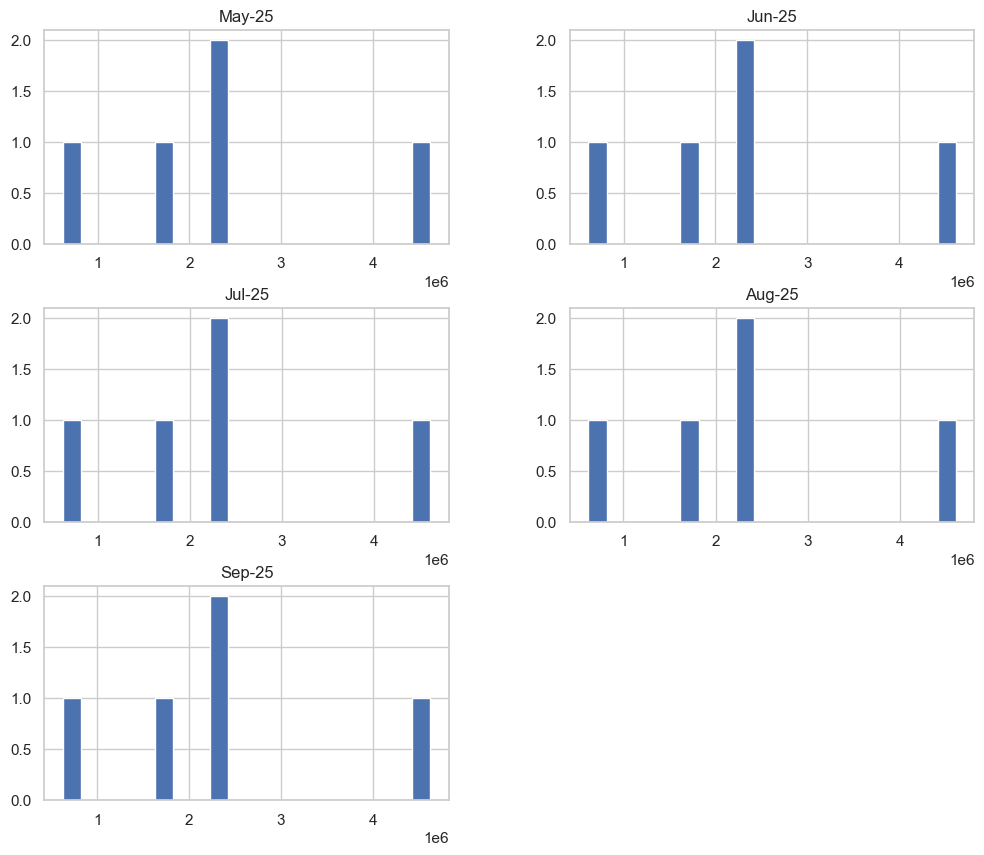

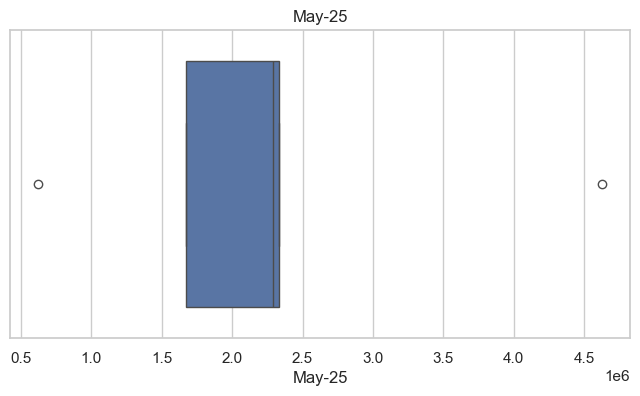

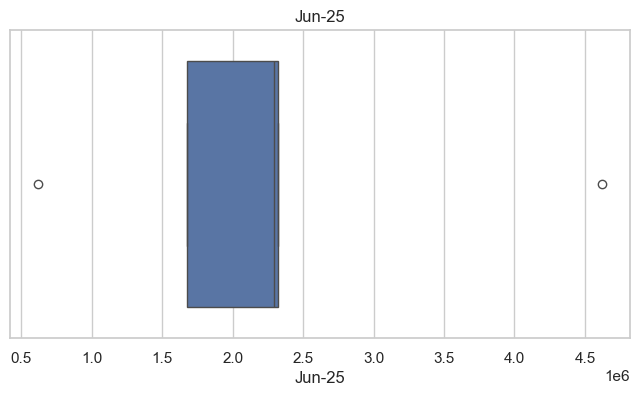

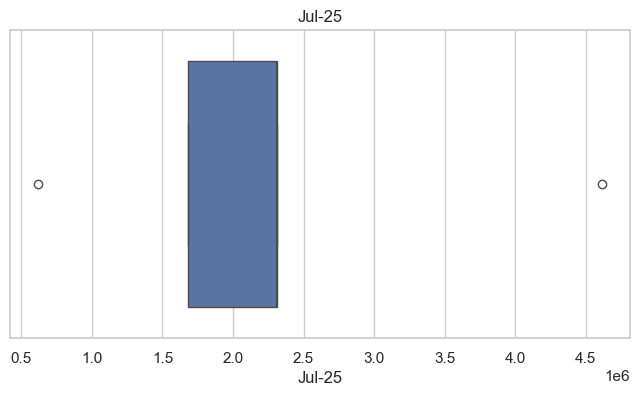

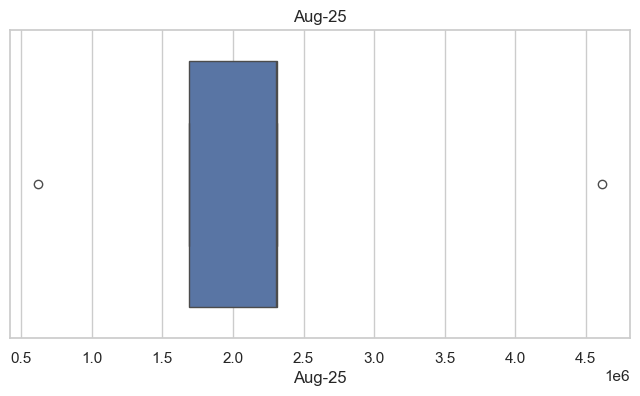

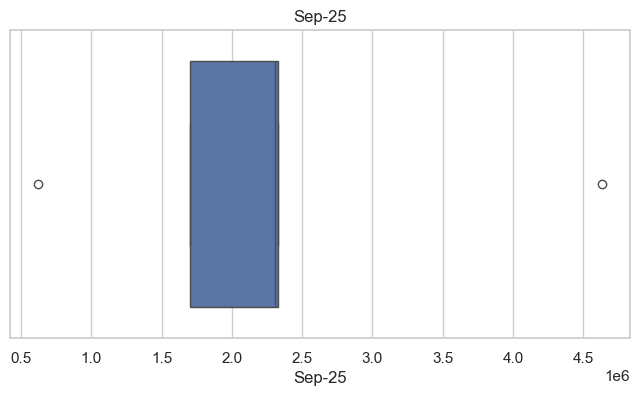

In [9]:
# Histogram for numeric columns
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Boxplots to check outliers
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


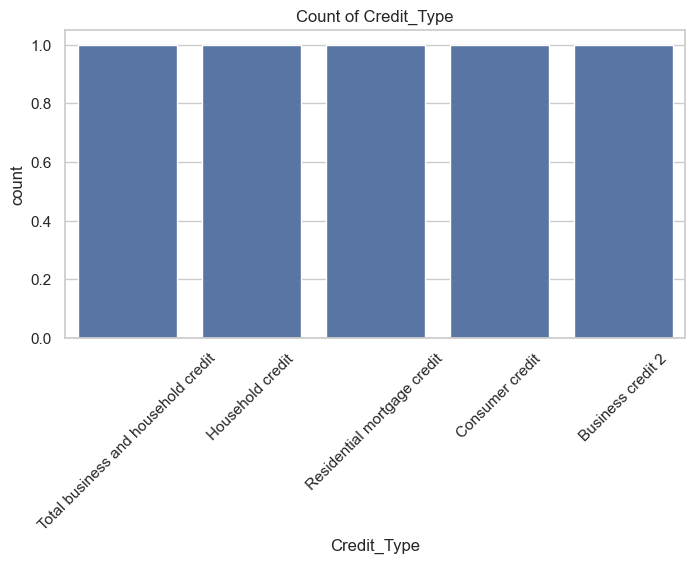

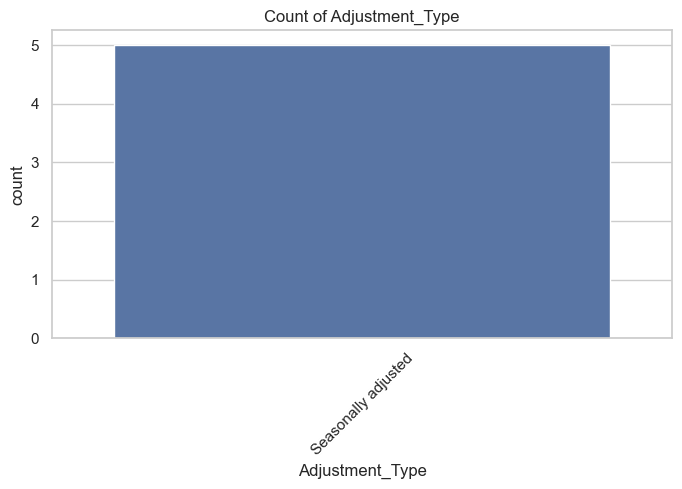

In [10]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


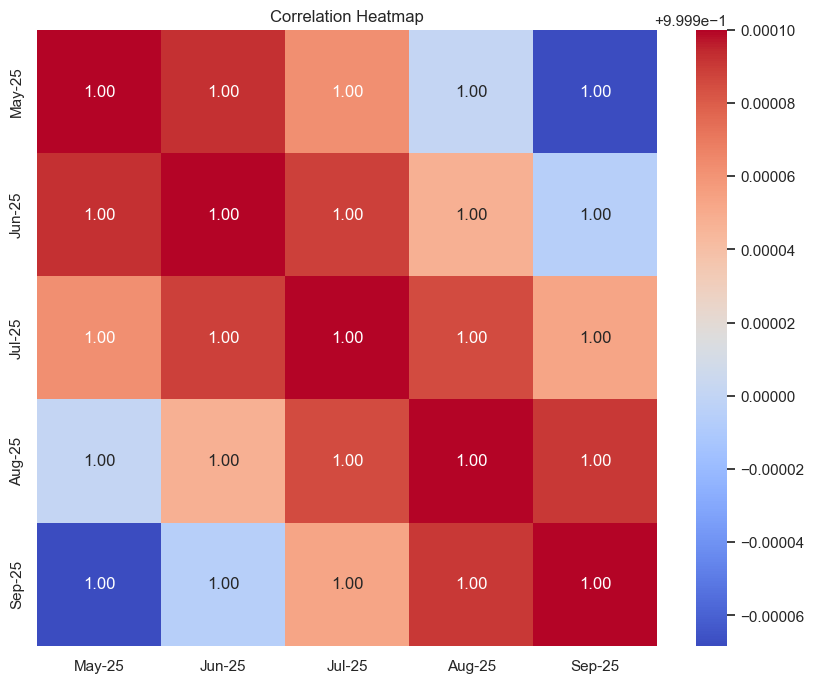

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation on numeric columns
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

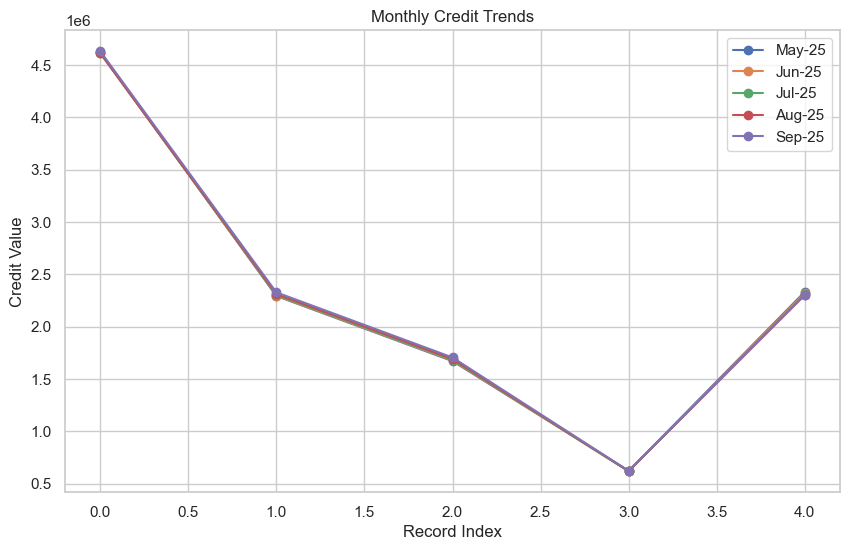

In [ ]:
# Example: plot credit changes over months
months = ['May-25', 'Jun-25', 'Jul-25', 'Aug-25', 'Sep-25']  # Adjust to your columns
plt.figure(figsize=(10,6))
for col in months:
    plt.plot(df.index, df[col], marker='o', label=col)
plt.xlabel('Record Index')
plt.ylabel('Credit Value')
plt.title('Monthly Credit Trends')
plt.legend()
plt.show()

# 1. Identify Outliers

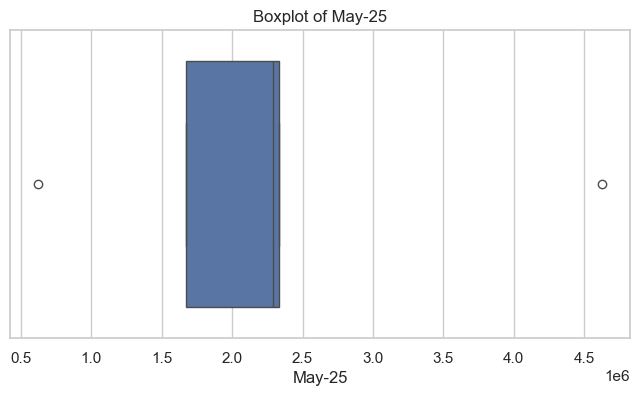

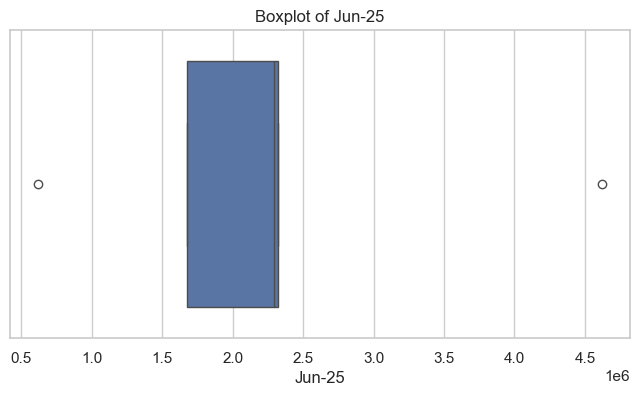

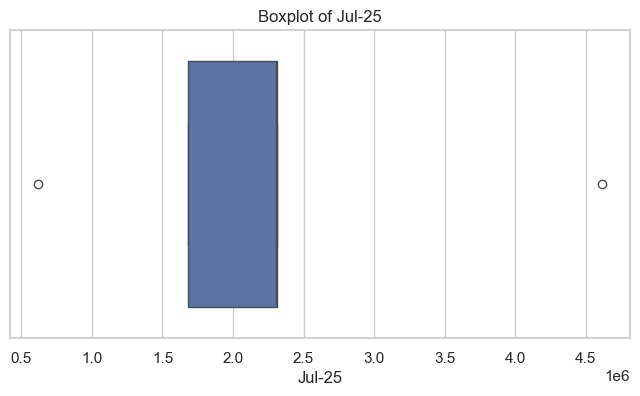

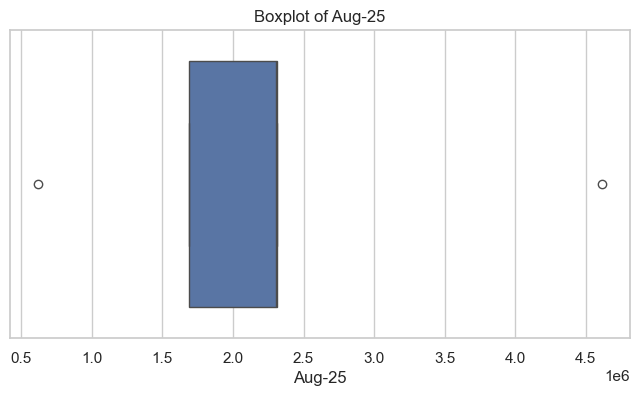

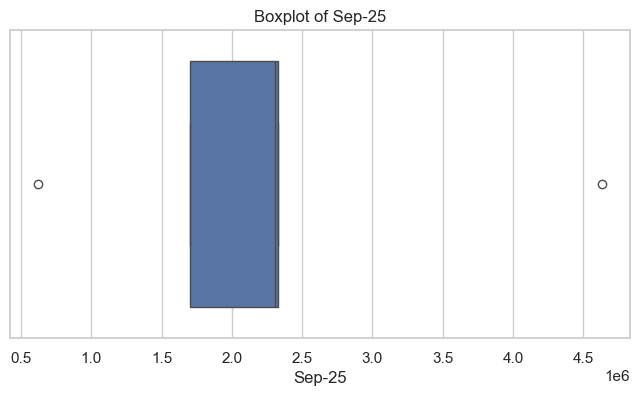

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [17]:
from scipy import stats
import numpy as np

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Identify rows with any Z-score > 3 (commonly used threshold)
outliers = np.where(z_scores > 3)
print(f"Outlier positions (row, column): {outliers}")

Outlier positions (row, column): (array([], dtype=int64), array([], dtype=int64))
